In [2]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(os.path.join("..", "..", "..", "cleanedfinalbeerdata.csv"))
df.head()

,Unnamed: 0,id,name,description,abv,styleId,id.1,name.1,shortName,description.1,id.2,BJCP Category name,isOrganic,createDate,ibu,srmId,originalGravity,Availability,Availability description
0,0,Ku1a3J,Adnams Ginger Beer,Our new lower alcohol Ginger Beer marks an exc...,2.5,125.0,125.0,Specialty Beer,Specialty,These beers are brewed using unusual fermentab...,11.0,Hybrid/mixed Beer,N,7/12/2012 12:28,NaN,NaN,NaN,NaN,NaN
1,1,0S5yCW,Alster,"Refreshingly Lemony, beautifully mild and even...",2.5,119.0,119.0,Fruit Beer,Fruit Beer,Fruit beers are any beers using fruit or fruit...,11.0,Hybrid/mixed Beer,N,2/17/2015 16:02,NaN,NaN,NaN,Year Round,Available year round as a staple beer.
2,2,KMcfsN,Altenburger Radler,NaN,2.5,119.0,119.0,Fruit Beer,Fruit Beer,Fruit beers are any beers using fruit or fruit...,11.0,Hybrid/mixed Beer,N,8/12/2012 12:23,NaN,NaN,NaN,NaN,NaN
3,3,t7flbd,Amstel Oud Bruin,NaN,2.5,94.0,94.0,American-Style Light (Low Calorie) Lager,American Light Lager,"These beers are extremely light colored, light...",8.0,North American Lager,N,4/24/2014 16:31,NaN,NaN,NaN,Year Round,Available year round as a staple beer.
4,4,3Or1VY,Apoldaer Radler,Beer mixed drink made ​​of 50% and 50% Apoldae...,2.5,119.0,119.0,Fruit Beer,Fruit Beer,Fruit beers are any beers using fruit or fruit...,11.0,Hybrid/mixed Beer,N,8/12/2012 12:24,NaN,NaN,NaN,NaN,NaN


In [72]:
finaldf1 = df[(df.srmId.notnull()) & (df.ibu.notnull()) & (df['ibu'] < 200)]

# finaldf = finaldf1[finaldf1['ibu'] < 200]
finaldf1.head()

,Unnamed: 0,id,name,description,abv,styleId,id.1,name.1,shortName,description.1,id.2,BJCP Category name,isOrganic,createDate,ibu,srmId,originalGravity,Availability,Availability description
60,60,b5a5de,4 Foot Drop,An American Style Pale Ale that is bold and tr...,4.0,25.0,25.0,American-Style Pale Ale,American Pale,American pale ales range from deep golden to c...,3.0,North American Origin Ales,N,9/11/2014 17:02,46.0,6.0,NaN,Limited,Limited availability.
66,66,1AiMAz,801 Small Batch Pilsner,"Light-bodied and refreshing, this quaffable Pi...",4.0,75.0,75.0,German-Style Pilsener,German Pilsener,A classic German Pilsener is very light straw ...,7.0,European-germanic Lager,N,9/10/2014 17:07,22.0,4.0,NaN,Year Round,Available year round as a staple beer.
67,67,wA9gZx,Abita Light,Light is uniquely hand-crafted using 100% all ...,4.0,94.0,94.0,American-Style Light (Low Calorie) Lager,American Light Lager,"These beers are extremely light colored, light...",8.0,North American Lager,N,1/3/2012 2:43,10.0,3.0,NaN,Year Round,Available year round as a staple beer.
112,112,QObMrh,Artsy Tartsy with Peaches,Brewing is an art that takes skill and creativ...,4.0,46.0,46.0,Berliner-Style Weisse (Wheat),Berlinerweisse,This is very pale in color and the lightest of...,4.0,German Origin Ales,N,5/28/2017 13:42,3.0,3.0,1.039,Summer,Available during the summer months.
129,129,iO2ZqT,Balmoral,A traditional English pale ale that is a stapl...,4.0,4.0,4.0,Special Bitter or Best Bitter,Special Bitter,Special bitter is more robust than ordinary bi...,1.0,British Origin Ales,N,6/22/2018 16:50,40.2,9.0,1.045,Year Round,Available year round as a staple beer.


In [12]:
# Generate 4 clusters of random data.
# from sklearn.datasets.samples_generator import make_blobs

# data, _ = make_blobs(n_samples=300, centers=4,
#                      cluster_std=0.60, random_state=0)
# data

array([[ 8.36856841e-01,  2.13635938e+00],
       [-1.41365810e+00,  7.40962324e+00],
       [ 1.15521298e+00,  5.09961887e+00],
       [-1.01861632e+00,  7.81491465e+00],
       [ 1.27135141e+00,  1.89254207e+00],
       [ 3.43761754e+00,  2.61654166e-01],
       [-1.80822253e+00,  1.59701749e+00],
       [ 1.41372442e+00,  4.38117707e+00],
       [-2.04932168e-01,  8.43209665e+00],
       [-7.11099611e-01,  8.66043846e+00],
       [-1.71237268e+00,  2.77780226e+00],
       [-2.67000792e+00,  8.35389140e+00],
       [ 1.24258802e+00,  4.50399192e+00],
       [-2.22783649e+00,  6.89479938e+00],
       [ 1.45513831e+00, -2.91989981e-02],
       [ 4.53791789e-01,  3.95647753e+00],
       [ 1.06923853e+00,  4.53068484e+00],
       [ 2.56936589e+00,  5.07048304e-01],
       [-1.06690610e+00,  3.13165795e+00],
       [-1.07859101e+00,  2.20451529e+00],
       [ 2.71506328e+00,  1.29082190e+00],
       [ 1.77710994e+00,  1.18655254e+00],
       [ 7.34363910e-01,  5.03725437e+00],
       [-1.

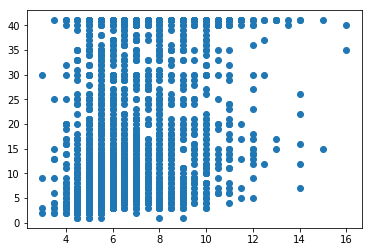

In [74]:
# Plot the data
plt.scatter(finaldf1['abv'], finaldf1['srmId'])

In [75]:
# Use n_clusters=4 as the k value
# We can see from the plot above that there are 4 clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=13)

In [76]:
import numpy as np
srmdata = np.array(list(zip(finaldf1['abv'].values, finaldf1['srmId'].values)))
srmdata
kmeans.fit(srmdata)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=13, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [78]:
# Predict the clusters
predicted_clusters = kmeans.predict(srmdata)
finaldf1['SRM predicted group'] = predicted_clusters
finaldf1.head()

C:\Users\Peter\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Unnamed: 0,id,name,description,abv,styleId,id.1,name.1,shortName,description.1,...,BJCP Category name,isOrganic,createDate,ibu,srmId,originalGravity,Availability,Availability description,predicted group,SRM predicted group
60,60,b5a5de,4 Foot Drop,An American Style Pale Ale that is bold and tr...,4.0,25.0,25.0,American-Style Pale Ale,American Pale,American pale ales range from deep golden to c...,...,North American Origin Ales,N,9/11/2014 17:02,46.0,6.0,NaN,Limited,Limited availability.,2,2
66,66,1AiMAz,801 Small Batch Pilsner,"Light-bodied and refreshing, this quaffable Pi...",4.0,75.0,75.0,German-Style Pilsener,German Pilsener,A classic German Pilsener is very light straw ...,...,European-germanic Lager,N,9/10/2014 17:07,22.0,4.0,NaN,Year Round,Available year round as a staple beer.,6,6
67,67,wA9gZx,Abita Light,Light is uniquely hand-crafted using 100% all ...,4.0,94.0,94.0,American-Style Light (Low Calorie) Lager,American Light Lager,"These beers are extremely light colored, light...",...,North American Lager,N,1/3/2012 2:43,10.0,3.0,NaN,Year Round,Available year round as a staple beer.,6,6
112,112,QObMrh,Artsy Tartsy with Peaches,Brewing is an art that takes skill and creativ...,4.0,46.0,46.0,Berliner-Style Weisse (Wheat),Berlinerweisse,This is very pale in color and the lightest of...,...,German Origin Ales,N,5/28/2017 13:42,3.0,3.0,1.039,Summer,Available during the summer months.,6,6
129,129,iO2ZqT,Balmoral,A traditional English pale ale that is a stapl...,4.0,4.0,4.0,Special Bitter or Best Bitter,Special Bitter,Special bitter is more robust than ordinary bi...,...,British Origin Ales,N,6/22/2018 16:50,40.2,9.0,1.045,Year Round,Available year round as a staple beer.,10,10


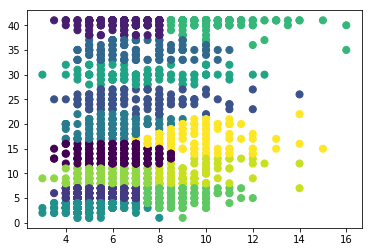

In [79]:
# Plot the predicted clusters to see if the model predicted the correct clusters
# This is visual validation that the model was trained correctly.
plt.scatter(srmdata[:, 0], srmdata[:, 1], c=predicted_clusters, s=50, cmap='viridis')

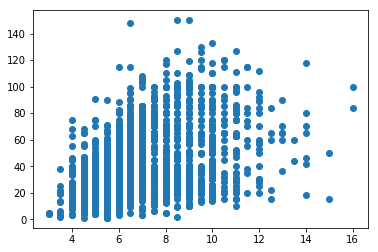

In [81]:
plt.scatter(finaldf1['abv'], finaldf1['ibu'])

In [82]:
ibudata = np.array(list(zip(finaldf1['abv'].values, finaldf1['ibu'].values)))
ibudata
kmeans.fit(ibudata)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=13, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [83]:
predicted_clusters2 = kmeans.predict(ibudata)
finaldf1['IBU predicted group'] = predicted_clusters2
finaldf1.head()

C:\Users\Peter\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Unnamed: 0,id,name,description,abv,styleId,id.1,name.1,shortName,description.1,...,isOrganic,createDate,ibu,srmId,originalGravity,Availability,Availability description,predicted group,SRM predicted group,IBU predicted group
60,60,b5a5de,4 Foot Drop,An American Style Pale Ale that is bold and tr...,4.0,25.0,25.0,American-Style Pale Ale,American Pale,American pale ales range from deep golden to c...,...,N,9/11/2014 17:02,46.0,6.0,NaN,Limited,Limited availability.,2,2,3
66,66,1AiMAz,801 Small Batch Pilsner,"Light-bodied and refreshing, this quaffable Pi...",4.0,75.0,75.0,German-Style Pilsener,German Pilsener,A classic German Pilsener is very light straw ...,...,N,9/10/2014 17:07,22.0,4.0,NaN,Year Round,Available year round as a staple beer.,6,6,7
67,67,wA9gZx,Abita Light,Light is uniquely hand-crafted using 100% all ...,4.0,94.0,94.0,American-Style Light (Low Calorie) Lager,American Light Lager,"These beers are extremely light colored, light...",...,N,1/3/2012 2:43,10.0,3.0,NaN,Year Round,Available year round as a staple beer.,6,6,5
112,112,QObMrh,Artsy Tartsy with Peaches,Brewing is an art that takes skill and creativ...,4.0,46.0,46.0,Berliner-Style Weisse (Wheat),Berlinerweisse,This is very pale in color and the lightest of...,...,N,5/28/2017 13:42,3.0,3.0,1.039,Summer,Available during the summer months.,6,6,5
129,129,iO2ZqT,Balmoral,A traditional English pale ale that is a stapl...,4.0,4.0,4.0,Special Bitter or Best Bitter,Special Bitter,Special bitter is more robust than ordinary bi...,...,N,6/22/2018 16:50,40.2,9.0,1.045,Year Round,Available year round as a staple beer.,10,10,6


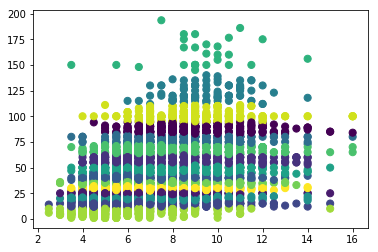

In [61]:
plt.scatter(ibudata[:, 0], ibudata[:, 1], c=predicted_clusters2, s=50, cmap='viridis')